In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Setting a Random Seed

In [25]:
np.random.seed(22)

In [26]:
np.random.randint(1,100)

5

<br>

### Roll a Single Dice
<hr>

This call to the np.random.randint() function, will result in one of the following random integers:
`1`, `2`, `3`, `4`, `5` or `6`

In [36]:
dice = np.random.randint(1,7)
print(dice)

5


<br>

### Roll `n` Dice
<hr>

This `for loop` will execute as many dice rolls as we like.

ex) if we want `10` dice rolls —set `n = 10`

ex) if we want `50` dice rolls —set `n = 50` 

The goal is to eventually combine *this* loop with some sort of game logic, to recreate the dice game.

The game logic will use the result of each roll to move our player **UP** or **DOWN**

In [43]:
n = 10
step = 5
for roll in range(n):
    dice = np.random.randint(1,7)
    print(dice)
    
    if dice < 3: 
        step = step +1 
    else: 
        step = step -1 
    print("step", step)
    

2
step 6
4
step 5
3
step 4
2
step 5
5
step 4
1
step 5
6
step 4
4
step 3
6
step 2
2
step 3


<br>

<h2 style="color:red"><center>---Exercise 1---</center></h2>

<hr>
<br>
<br>

### Ex1. Game Logic - Taking a Step (Solution)

In [46]:
# Set inital Step
step = 5 

# Roll a Single Dice 
dice = np.random.randint(1,7)
print("Initial Step:", step)
print()


# Game Logic
if dice <= 2:
    step = step - 1
    
elif dice <= 5:
    step = step + 1 
    
else:
    new_roll = np.random.randint(1,7)
    step = step + new_roll
    

print("After Dice Roll:", step)

Initial Step: 5

After Dice Roll: 7


<hr>
<br>
<br>

### A simple random walk

In [47]:
tiles = [0]

for flip in range(10):
    # grab most recent tile position
    tile = tiles[-1]
    
    # flip coin
    coin = np.random.randint(2)
    
    
    # game logic
    if coin == 0:
        next_tile = tile + 1
        
    else:
        next_tile = tile - 1
    
    
    # add to random_walk
    tiles.append(next_tile)
    
# Print results
print(tiles)

[0, -1, 0, -1, 0, -1, -2, -1, -2, -3, -2]


<h2 style="color:red"><center>---Exercise 2---</center></h2>

<hr>
<br>
<br>

### Ex2. Increasing Complexity - Random Walk (Solution)

Now, we want to be able to capture each next step, so we have a history of each step that was landed on.
A python list would be the perfect tool here because of the `append` method.

In [154]:
# initiate random walk at step 0
random_walk = [0]

for roll in range(10):
#     Grab most recent step and roll a new die
    prev_step = random_walk[-1]
    dice = np.random.randint(1,7)
    
#     game logic to decide next step
    if dice <= 2:
        next_step = max(0, prev_step - 1)
        
    elif dice <= 5:
        next_step = prev_step + 1
        
    else:
        next_step = prev_step + np.random.randint(1,7)
        
#     Append each new step to random_walk    
    random_walk.append(next_step)
    
print(random_walk)

[0, 0, 0, 0, 1, 0, 1, 2, 3, 2, 3]


<hr>
<br>
<br>

## Simulate Game Using Functions

<br>

### `dice_roll()`

>**Input:** None

>**Output:** `dice`; Random Integer in range: [1,2,3,4,5,6]

In [187]:
def dice_roll():
    return np.random.randint(1,7)

<br>
<br>

### `dice_game()`

This function takes in a current `step`, performs the dice game logic, and outputs a `next_step`

> **Input:** `step` - Integer

> **Output:** `next_step` - Integer

In [216]:
def dice_game(step):
    dice = dice_roll()
    
    if dice <= 2:
        next_step = max(0, step - 1)
    elif dice <= 5:
        next_step = step + 1 
    else:
        next_step = step + dice_roll()
        
#     if np.random.rand() <= 0.001:
#         next_step = 0
        
    return next_step

<br>
<br>

### `random_walk()`

>**Input:** None

>**Output:** A Single `random_walk`

In [203]:
def random_walk():
    random_walk = [0]
    
    for roll in range(100):
        step = random_walk[-1]
        next_step = dice_game(step)
        random_walk.append(next_step)
    return random_walk

<br>
<br>

### `simulate_games()`

>**Input:** `num_sims` - Integer

>**Output:** `all_walks` - Numpy Array of `random_walks`
>> `num_sims` will decide how many `random_walks` will be contained inside of `all_walks`

In [204]:
def simulate_games(num_sims):
    all_walks = []
    for sim in range(num_sims):
        rand_walk = random_walk()
        all_walks.append(rand_walk)
        np_walks = np.array(all_walks)
    return np.transpose(np_walks)

<br>

### `plot_distribution()`

>**Input:** `all_walks` - numpy array of all `random_walks`

>**Output:** Histogram of all `final_steps`

In [205]:
def plot_distribution(dist):
    plt.hist(all_walks[-1])
    plt.title('Dice Game Outcomes')
    plt.xlabel('Game Outcome')
    plt.ylabel('# Games')
    plt.show()

### `plot_all_walks()`

>**Input:** `all_walks` - numpy array of all `random_walks`

>**Output:** plots every single `random_walk`

In [213]:
def plot_all_walks(all_walks):
    plt.figure()
    ax = plt.gca()
    ax.set_xlabel("Dice Roll (Time)")
    ax.set_ylabel("Steps Taken (Random Walk)")
    ax.plot(all_walks)
    plt.show()

<hr>
<br>
<br>

### Run Simulations and Plot Results

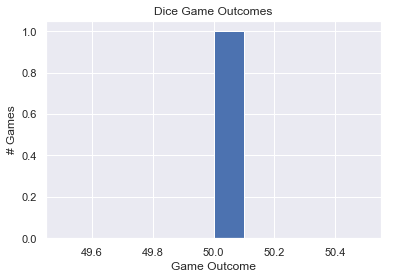

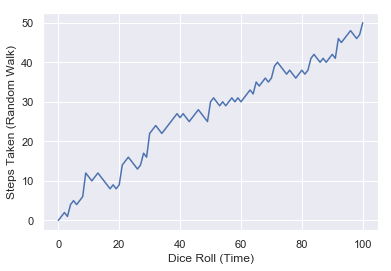

In [221]:
all_walks = simulate_games(1)
plot_distribution(all_walks)
plot_all_walks(all_walks)